# 3 - Imaging features normalization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os

## Introduction

In this notbook we will normalize the putamen and caudate DaTSCAN uptake values.

Since putamen and caudate uptake values fall in different range of values, and this could cause bias during the SNP-phenotype associations, we normalize the two measures.

Moreover, since DaTSCAN measures for both putamen and caudate are contnous values, for the normalization, we applied a rank-based inverse normal transformation (r-INT). 

We choose r-INT for its lower susceptibility to outlier values.

In [2]:
datscan_path = "../../data/imaging/DaTSCAN/"
genetics_path = "../../data/genotyping/"

## Exploring DaTSCAN data

On PPMI are available different DaTSCAN measures for several subjects involved in the study.

For healthy control subjects we have a measurment made during their baseline visit, while for PD patients are available DaTSCAN uptake values retrieved during their first visit and following tests.

In our study we consider only the values obtained during the baseline visits (or the closeset visit with respect to the genetic data collection time point).

In [3]:
datscan = pd.read_csv(
    os.path.join(datscan_path, "DATScan_Analysis.csv")
)
datscan.head(n=10)

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3250,SC,2010-12-23,2.31,2.63,1.77,1.92
1,3204,SC,2010-12-23,3.66,3.02,1.36,1.67
2,3555,SC,2011-01-13,2.19,2.11,1.02,1.09
3,3403,SC,2010-07-01,1.64,1.19,0.65,0.43
4,3554,SC,2011-01-20,3.00,3.19,1.94,2.09
5,3505,SC,2010-12-09,1.78,1.87,0.54,0.52
6,3504,SC,2010-12-15,1.74,1.69,1.13,0.64
7,3160,SC,2011-01-13,2.93,2.79,1.47,1.37
8,3157,SC,2011-01-20,2.23,2.62,1.81,1.64
9,3156,SC,2011-01-06,3.19,3.23,1.72,1.75


## Retrieving data related to our subjects

First, we need to retrieve the DaTSCAN measures obtained from the subjects we considered in our study during the first test they took.

We remind that we considered only HCs and PD subjects (SWEDD patients excluded) with European ancestry, to avoid possible bias due to population specific genetic make-up which can affect the SNP-phenotype associations.

In [6]:
# loading the EU patient IDs
eu_pats = pd.read_csv(
    os.path.join(genetics_path, "PPMI_eu_noswedd.fam"),
    header=None,
    sep=" "
)
eu_pats

,0,1,2,3,4,5
0,3000,3000,0,0,2,-9
1,3001,3001,0,0,1,-9
2,3002,3002,0,0,2,-9
3,3004,3004,0,0,1,-9
4,3006,3006,0,0,2,-9
...,...,...,...,...,...,...
420,4124,4124,0,0,1,-9
421,4125,4125,0,0,1,-9
422,4126,4126,0,0,1,-9
423,4136,4136,0,0,1,-9


In [7]:
# selecting DaTSCAN data from our subjects
datscan_eu = datscan[datscan["PATNO"].isin(eu_pats.iloc[:,0].tolist())].sort_values(["PATNO", "SCAN_DATE"]).reset_index(drop=True)
datscan_eu

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,SC,2011-01-20,2.99,3.43,2.94,2.63
1,3001,U01,2011-06-23,2.00,1.92,0.80,0.65
2,3001,V04,2012-04-06,1.56,1.12,0.62,0.48
3,3001,V06,2013-05-03,1.68,1.26,0.38,0.42
4,3001,U02,2014-04-25,1.53,0.65,0.37,0.50
...,...,...,...,...,...,...,...
1152,4126,V04,2014-04-24,1.44,1.29,0.44,0.49
1153,4126,V06,2015-04-15,1.59,1.27,0.47,0.58
1154,4126,V10,2017-04-06,1.04,0.89,0.37,0.69
1155,4136,SC,2013-02-13,0.68,0.57,0.36,0.27


We can retrieve the data obtained during the first DaTSCAN visit for each subjects.

In [8]:
# first occurrence kept by default
datscan_eu_fv = datscan_eu.drop_duplicates(["PATNO"]).reset_index(drop=True)
datscan_eu_fv

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L
0,3000,SC,2011-01-20,2.99,3.43,2.94,2.63
1,3001,U01,2011-06-23,2.00,1.92,0.80,0.65
2,3002,U01,2011-06-28,2.92,3.72,1.01,1.78
3,3004,U01,2011-08-24,5.09,5.30,3.54,2.97
4,3006,SC,2011-08-02,2.28,2.12,0.76,0.15
...,...,...,...,...,...,...,...
417,4124,SC,2013-02-22,1.95,1.59,0.61,0.68
418,4125,SC,2013-02-28,2.03,2.47,0.88,1.49
419,4126,SC,2013-03-07,1.54,1.88,0.63,0.40
420,4136,SC,2013-02-13,0.68,0.57,0.36,0.27


In [9]:
datscan_eu_fv_fn = "DATScan_Analysis_eu_fv.csv"
datscan_eu_fv.to_csv(os.path.join(datscan_path, datscan_eu_fv_fn), index=False)

Unfortunately, for three of our subjects we do not have DaTSCAN measures. 

So, we need to remove them from the subjects considered in our study. 

In [10]:
diff = np.setdiff1d(eu_pats.iloc[:,0], datscan_eu_fv.iloc[:,0])
diff

array([4082, 4083, 4085])

In [11]:
eu_pats_ds_fn = "eu_pats_ds.txt"
eu_pats_ds = eu_pats[~eu_pats[0].isin(list(diff))]
eu_pats_ds.iloc[:,[0,1]].to_csv(
    os.path.join(genetics_path, eu_pats_ds_fn), header=False, index=False, sep=" "
)

As done during the previous preprocessing step, we use PLINK to keep data related to the subjects with available DaTSCAN measures.

In [12]:
noswedd_eu_fn = "PPMI_eu_noswedd"
noswedd_eu_ds_fn = "PPMI_eu_noswedd_ds"

!plink --bfile {os.path.join(genetics_path, noswedd_eu_fn)} --keep {os.path.join(genetics_path, eu_pats_ds_fn)} --make-bed --out {os.path.join(genetics_path, noswedd_eu_ds_fn)}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/PPMI_eu_noswedd_ds.log.
Options in effect:
  --bfile ../../data/genotyping/PPMI_eu_noswedd
  --keep ../../data/genotyping/eu_pats_ds.txt
  --make-bed
  --out ../../data/genotyping/PPMI_eu_noswedd_ds

32768 MB RAM detected; reserving 16384 MB for main workspace.
129241 variants loaded from .bim file.
425 people (289 males, 136 females) loaded from .fam.
--keep: 422 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 422 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.996646.
129241 variants and 422

## Normalizing DaTSCAN values 

As discussed before caudate and putamen uptake values fell in different range of values. To avoid possible errors during SNP-phenotype associations due to th different spaces of values, we need to normalize the DaTSCAN values, in order to have them on the same range of values.

To normalize the values we chose to apply the rank-based inverse normal transformation, since this procedure has been shown to be less susceptible to outliers.

Briefly, given a vector given a vector of continuous values *x*, r-INT normalizes it, accounting for the rank assigned to each value *x*(*i*) after sorting *x* and computing for each *x*(*i*) the corresponding z-score.

Let's normalize the DaTSCAN values.

In [17]:
!Rscript datscanNorm.R

Carico il pacchetto richiesto: RNOmni
Error in match.fun(FUN) : oggetto "RankNorm" non trovato
Calls: apply -> match.fun
Esecuzione interrotta


Let's now explore how the DaTSCAN values are distributed among the Healthy controls and the PD patients.

In [13]:
patdocs_path = "../../data/patient_docs/"

# assign his/her cathegory (HC or PD) to each subject
datscan_norm = pd.read_csv(
    os.path.join(datscan_path, "DATScan_Analysis_eu_fv_norm.csv")
)

status = pd.read_csv(
    os.path.join(patdocs_path, "Patient_Status.csv")
).loc[:, ["PATNO", "ENROLL_CAT"]] # we are only interested in enrollment cathegory

status = status[status["PATNO"].isin(datscan_norm.iloc[:,0].tolist())]
status.reset_index(inplace=True, drop=True)

# merge the info
datscan_norm_status = datscan_norm.merge(status, on = ["PATNO"])
datscan_norm_status.head(n=10)

,PATNO,EVENT_ID,SCAN_DATE,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,ENROLL_CAT
0,3000,SC,2011-01-20,0.932467,1.368655,1.786562,1.448689,HC
1,3001,U01,2011-06-23,-0.313764,-0.507784,-0.313764,-0.648172,PD
2,3002,U01,2011-06-28,0.835925,1.656152,0.032656,0.696547,PD
3,3004,U01,2011-08-24,2.971827,2.971827,2.383049,1.882275,HC
4,3006,SC,2011-08-02,0.038596,-0.188099,-0.408846,-2.499599,PD
5,3008,SC,2011-08-30,1.957186,1.407545,0.941676,1.023443,HC
6,3011,SC,2011-07-07,1.600299,1.848464,2.095619,1.611072,HC
7,3012,SC,2011-10-11,-0.221442,-0.276558,-2.021570,-0.434802,PD
8,3016,SC,2012-01-17,1.510772,1.558962,1.611072,1.262883,HC
9,3018,SC,2012-02-29,-0.360897,-1.018445,-0.823362,-1.730834,PD


Interestingly, after normalization we can see a clear separation between the DaTSCAN uptake values of HCs and PD patients for all the four imaging features.

Text(0.5, 1.0, 'Caudate Right side')

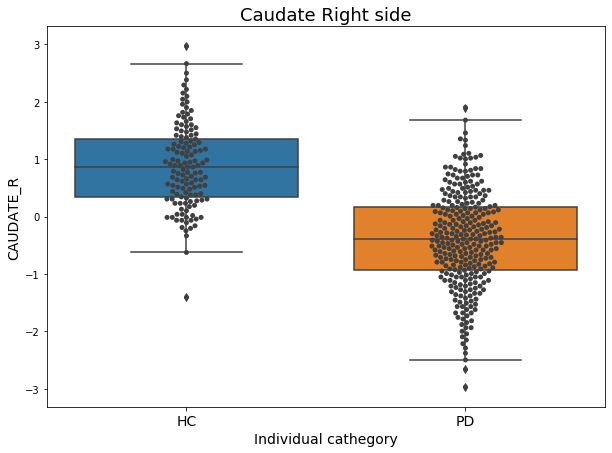

In [14]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(
    x = "ENROLL_CAT",
    y = "CAUDATE_R",
    data = datscan_norm_status,
)
ax = sns.swarmplot(
    x = "ENROLL_CAT",
    y = "CAUDATE_R",
    data = datscan_norm_status,
    color = ".25"
)
plt.xticks([0,1], ["HC", "PD"], size = 14)
plt.xlabel("Individual cathegory", size = 14)
plt.ylabel("CAUDATE_R", size = 14)
plt.title("Caudate Right side", size = 18)

Text(0.5, 1.0, 'Caudate Left side')

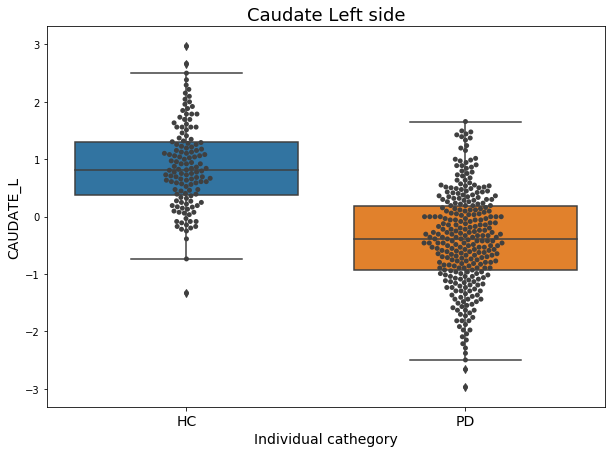

In [15]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(
    x = "ENROLL_CAT",
    y = "CAUDATE_L",
    data = datscan_norm_status,
)
ax = sns.swarmplot(
    x = "ENROLL_CAT",
    y = "CAUDATE_L",
    data = datscan_norm_status,
    color = ".25"
)
plt.xticks([0,1], ["HC", "PD"], size = 14)
plt.xlabel("Individual cathegory", size = 14)
plt.ylabel("CAUDATE_L", size = 14)
plt.title("Caudate Left side", size = 18)

Text(0.5, 1.0, 'Putamen Right side')

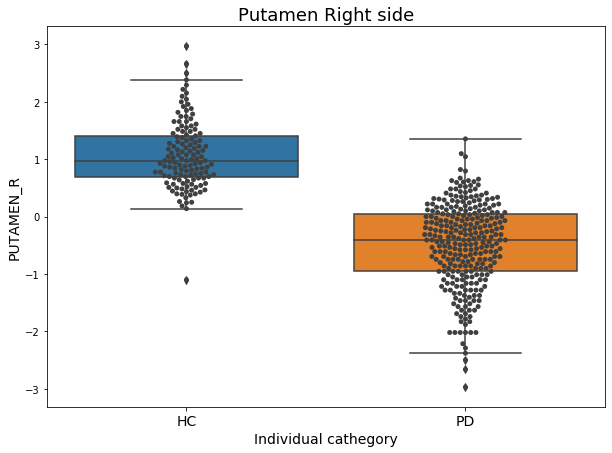

In [16]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(
    x = "ENROLL_CAT",
    y = "PUTAMEN_R",
    data = datscan_norm_status,
)
ax = sns.swarmplot(
    x = "ENROLL_CAT",
    y = "PUTAMEN_R",
    data = datscan_norm_status,
    color = ".25"
)
plt.xticks([0,1], ["HC", "PD"], size = 14)
plt.xlabel("Individual cathegory", size = 14)
plt.ylabel("PUTAMEN_R", size = 14)
plt.title("Putamen Right side", size = 18)

Text(0.5, 1.0, 'Putamen Left side')

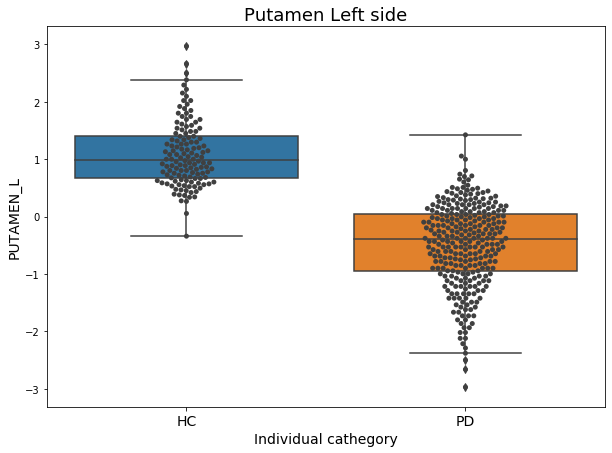

In [17]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(
    x = "ENROLL_CAT",
    y = "PUTAMEN_L",
    data = datscan_norm_status,
)
ax = sns.swarmplot(
    x = "ENROLL_CAT",
    y = "PUTAMEN_L",
    data = datscan_norm_status,
    color = ".25"
)
plt.xticks([0,1], ["HC", "PD"], size = 14)
plt.xlabel("Individual cathegory", size = 14)
plt.ylabel("PUTAMEN_L", size = 14)
plt.title("Putamen Left side", size = 18)